In [1]:
import numpy as np
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

### Useful functions

In [2]:
def get_entries(filename):
    file = uproot.open(filename)
    events = file['Hits']
    energy = events.array("m_energy")
    return len(energy)



## Investigate how thickness affect the light collection efficiency with different surface treatments to the scintillator 

Look into LYSO crystal so obtained result can be compared to literature

In [237]:
folder = 'rindex_1p81_dielectric-LUTDAVIS_LUT/'
model = '_DAVIS'
finishes = ['groundair', 'groundteflonair', 'groundvm2000air', 
            'polishedair', 'polishedteflonair', 'polishedvm2000air']
for finish in finishes:
    filename1 = "%sneutron_beam_25meV_1.5mm_LUT_%s.root" % (folder, finish)
    filename2 = "%sneutron_beam_25meV_2mm_LUT_%s.root" % (folder, finish)
    filename3 = "%sneutron_beam_25meV_6mm_LUT_%s.root"% (folder, finish)
    filename4 = "%sneutron_beam_25meV_20mm_LUT_%s.root"% (folder, finish)

    print("%s%s = [%d, %d, %d, %d]" % 
         (finish, model, get_entries(filename1), get_entries(filename2), 
          get_entries(filename3), get_entries(filename4))
         )

groundair_DAVIS = [182930, 295507, 198773, 89445]
groundteflonair_DAVIS = [189199, 275534, 171246, 92457]
groundvm2000air_DAVIS = [251332, 160305, 171506, 71066]
polishedair_DAVIS = [253915, 200224, 154672, 101220]
polishedteflonair_DAVIS = [186267, 190810, 146371, 78680]
polishedvm2000air_DAVIS = [207304, 186827, 167428, 80720]


In [178]:
thickness = [1.5, 2, 6, 20]

# Model: unified, Surface Type: dielectric-LUT
groundair_unified = [186170, 176775, 200395, 84749]
groundteflonair_unified = [220991, 217934, 261564, 153689]
groundvm2000air_unified = [118139, 176476, 195813, 176078]
polishedair_unified = [174323, 174289, 158864, 94565]
polishedteflonair_unified = [135303, 211967, 165753, 169142]
polishedvm2000air_unified = [188490, 218522, 231351, 177907]

# Model: LUT, Surface Type: dielectric-LUTDAVIS
groundair_DAVIS = [182930, 295507, 198773, 89445]
groundteflonair_DAVIS = [189199, 275534, 171246, 92457]
groundvm2000air_DAVIS = [251332, 160305, 171506, 71066]
polishedair_DAVIS = [253915, 200224, 154672, 101220]
polishedteflonair_DAVIS = [186267, 190810, 146371, 78680]
polishedvm2000air_DAVIS = [207304, 186827, 167428, 80720]

# Model: LUT, Surface Type: dielectric-LUT
groundair = [118850, 186049, 155795, 87303]
groundteflonair = [187650, 214496, 230275, 140367]
groundvm2000air = [232826, 204940, 249408, 158288]
polishedair = [162465, 174764, 168235, 88035]
polishedteflonair = [162147, 191903, 196923, 182703]
polishedvm2000air = [165799, 215168, 226125, 242830]

## Critical Angle

In [235]:
def critical_angle(n_i, n_t):
    rad = np.arcsin(n_t/n_i)
    return rad/np.pi*180

# n = 1.35-1.38 teflon, critical angle = 60.57 - 62.91
# n = 2.6 TiO2, critical angle = 
# n = 0.6-0.8 ESR, critical angle = 22.77 - 31.07
# n = 1.0 air, critical angle = 40.18

critical_angle(1.81, 1.5)

55.96842494093397

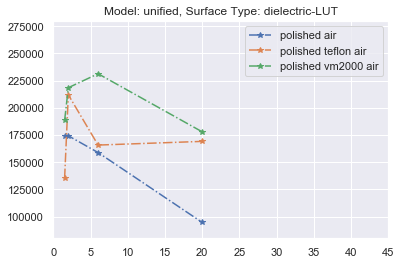

In [207]:
plt.plot(thickness, polishedair_unified, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_unified, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_unified, '-.*', label="polished vm2000 air") 
# plt.plot(thickness, groundair_unified, '-.*', label="ground air") 
# plt.plot(thickness, groundteflonair_unified, '-.*', label="ground teflon air") 
# plt.plot(thickness, groundvm2000air_unified, '-.*', label="ground vm2000 air") 
plt.title("Model: unified, Surface Type: dielectric-LUT")
plt.axis([0,45,80000,280000])
plt.legend()

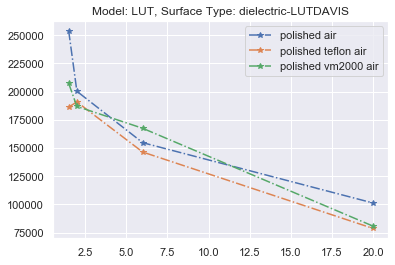

In [214]:
plt.plot(thickness, polishedair_DAVIS, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_DAVIS, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_DAVIS, '-.*', label="polished vm2000 air") 
# plt.plot(thickness, groundair_DAVIS, '-.*', label="ground air") 
# plt.plot(thickness, groundteflonair_DAVIS, '-.*', label="ground teflon air") 
# plt.plot(thickness, groundvm2000air_DAVIS, '-.*', label="ground vm2000 air") 
plt.title("Model: LUT, Surface Type: dielectric-LUTDAVIS")
plt.legend()

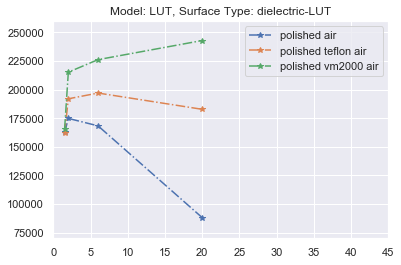

In [215]:
plt.plot(thickness, polishedair, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air, '-.*', label="polished vm2000 air") 
# plt.plot(thickness, groundair, '-.*', label="ground air") 
# plt.plot(thickness, groundteflonair, '-.*', label="ground teflon air") 
# plt.plot(thickness, groundvm2000air, '-.*', label="ground vm2000 air") 
plt.title("Model: LUT, Surface Type: dielectric-LUT")
plt.axis([0,45,70000,260000])
plt.legend()

In [147]:
filename1 = "neutron_beam_25meV_1.5mm_LUT_groundair.root"
filename2 = "neutron_beam_25meV_1.5mm_LUT_groundteflonair.root"
filename3 = "neutron_beam_25meV_1.5mm_LUT_groundvm2000air.root"

filename4 = "neutron_beam_25meV_1.5mm_LUT_polishedair.root"
filename5 = "neutron_beam_25meV_1.5mm_LUT_polishedteflonair.root"
filename6 = "neutron_beam_25meV_1.5mm_LUT_polishedvm2000air.root"


print("ground: %d, %d, %d" % 
      (get_entries(filename1), get_entries(filename2), get_entries(filename3)))
print()
print("polished: %d, %d, %d" % 
      (get_entries(filename4), get_entries(filename5), get_entries(filename6)))


ground: 186170, 220991, 118139

polished: 174323, 135303, 188490


In [148]:
r2p1_ground1mm = [137708, 218524, 165900]
r2p1_ground2mm = [160209, 211408, 189166] # rindex = 2.1
r2p1_ground6mm = [162026, 238311, 174801] # rindex = 2.1


# Investigating LYSO so can compare with literature 
r1p8_ground1mm_unified = [186170, 220991, 118139]
r1p8_ground2mm_unified = [176775, 217934, 176476]
r1p8_ground6mm_unified = [200395, 261564, 195813]
r1p8_ground20mm_unified = [84749, 153689, 176078]

r1p8_polished1mm_unified = [174323, 135303, 188490]
r1p8_polished2mm_unified = [174289, 211967, 218522]
r1p8_polished6mm_unified = [158864, 165753, 231351]
r1p8_polished20mm_unified = [94565, 169142, 1779087]

r1p8_ground1mm_DAVIS = [182930, 189199, 251332]
r1p8_ground2mm_DAVIS = [295507, 275534, 160305]
r1p8_ground6mm_DAVIS = [198773, 171246, 171506]
r1p8_ground20mm_DAVIS = [89445, 92457, 71066]

r1p8_polished1mm_DAVIS = [253915, 186267, 207304]
r1p8_polished2mm_DAVIS = [200224, 190810, 186827]
r1p8_polished6mm_DAVIS = [154672, 146371, 167428]
r1p8_polished20mm_DAVIS = [101220, 78680, 80720]

r1p8_ground1mm = [118850, 187650, 232826]
r1p8_ground2mm = [186049, 214496, 204940]
r1p8_ground6mm = [155795, 230275, 249408]
r1p8_ground20mm = [87303, 140367, 158288]

r1p8_polished1mm = [162465, 162147, 165799]
r1p8_polished2mm = [174764, 191903, 215168]
r1p8_polished6mm = [168235, 196923, 226125]
r1p8_polished20mm = [88035, 182703, 242830]

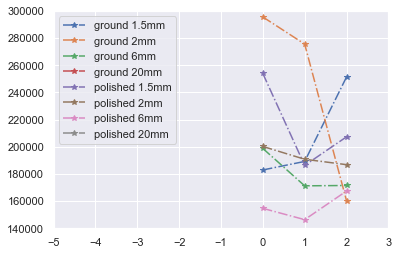

In [121]:
plt.plot(r1p8_ground1mm_DAVIS, '-.*', label='ground 1.5mm')
plt.plot(r1p8_ground2mm_DAVIS, '-.*', label='ground 2mm')
plt.plot(r1p8_ground6mm_DAVIS, '-.*', label='ground 6mm')
plt.plot(r1p8_ground20mm_DAVIS, '-.*', label='ground 20mm')
plt.plot(r1p8_polished1mm_DAVIS, '-.*', label='polished 1.5mm')
plt.plot(r1p8_polished2mm_DAVIS, '-.*', label='polished 2mm')
plt.plot(r1p8_polished6mm_DAVIS, '-.*', label='polished 6mm')
plt.plot(r1p8_polished20mm_DAVIS, '-.*', label='polished 20mm')
plt.axis([-5,3,140000,300000])
plt.legend()

Conclusion: (refractive index of 1.81, dielectric-LUT_DAVIS, LUT model)
1. having reflector doesn't help light collection in general (doesn't make sense...
2. ESR and teflon don't have consistent performance 

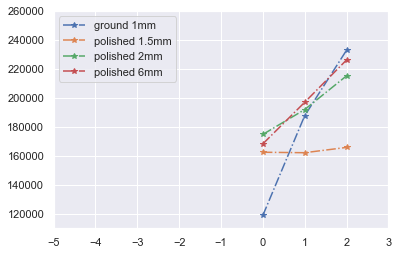

In [110]:
plt.plot(r1p8_ground1mm, '-.*', label='ground 1mm')
# plt.plot(r1p8_ground2mm, '-.*', label='ground 2mm')
# plt.plot(r1p8_ground6mm, '-.*', label='ground 6mm')
plt.plot(r1p8_polished1mm, '-.*', label='polished 1.5mm')
plt.plot(r1p8_polished2mm, '-.*', label='polished 2mm')
plt.plot(r1p8_polished6mm, '-.*', label='polished 6mm')
plt.axis([-5,3,110000,260000])
plt.legend()

Conclusions: (reflective index of 1.81, dielectric-LUT, LUT model) 
1. having reflectors allows a higher light collection efficiency
2. ESR (specular) seems to outperform teflon (lambertian)

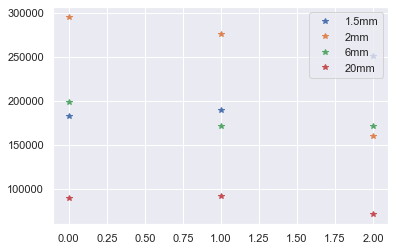

In [29]:
plt.plot(groundESR1mm, '*', label='1.5mm')
plt.plot(groundESR2mm, '*', label='2mm')
plt.plot(groundESR6mm, '*', label='6mm')
plt.plot(groundESR20mm, '*', label='20mm')
plt.legend()

In [2]:
def generate_data(folder,filename,x_position,y_position,z_position,counts):
    x,y,z = np.array(filename.split('_')[2:5]).astype(float)
    x_position.append(x)
    y_position.append(y)
    z_position.append(z)
    file = uproot.open(folder + filename)
    events = file['Hits']
    energy = events.array("m_energy")
    counts.append(len(energy))
    return x_position, y_position, z_position, energy, counts
    
folder = 'groundair/'
filename = 'opticalphoton_3eV_0.75_-0.25_-0.75_LUT_groundair.root'
x,y,z = np.array(filename.split('_')[2:5]).astype(float)
file = uproot.open(folder + filename)
events = file['Hits']
energy = events.array("m_energy")
len(energy)

8928

In [72]:
# folder = '/Users/suannchong/Documents/results/opticalphoton_positions/groundair/'
folder = '/Users/suannchong/Desktop/Geant4/mpnd_suann/build/results/polishedair/'
directory = os.fsencode(folder)

x_position = []
y_position = []
z_position = []
counts = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".root"):
        generate_data(folder,filename,x_position,y_position,z_position,counts)
#         print(filename)
    else:
        continue
        
data = {'x':x_position, 'y':y_position, 'z':z_position, 'counts':counts}
df = pd.DataFrame(data).sort_values(by=['x', 'y', 'z'])

       x    y     z  counts
174  0.0  0.0 -0.75    9436
314  0.0  0.0 -0.50    9452
112  0.0  0.0 -0.25    9403
321  0.0  0.0  0.00    9402
316  0.0  0.0  0.25    9437
58   0.0  0.0  0.50    9445
272  0.0  0.0  0.75    9407


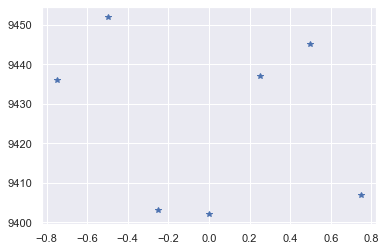

In [73]:
df_x = df[df['x'] == 0.0]
df_y = df_x[df_x['y'] == 0.0]
print(df_y)

plt.plot(df_y['z'], df_y['counts'],'*')

        x     y     z  counts
100 -0.75 -0.75 -0.75    9462
283 -0.75 -0.75 -0.50    9423
148 -0.75 -0.75 -0.25    9459
290 -0.75 -0.75  0.00    9398
291 -0.75 -0.75  0.25    9445
162 -0.75 -0.75  0.50    9464
320 -0.75 -0.75  0.75    9415


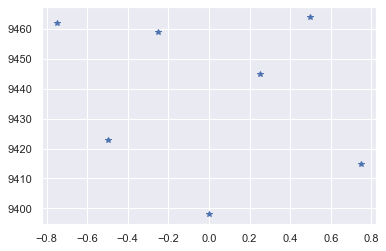

In [74]:
df_x = df[df['x'] == -0.75]
df_y = df_x[df_x['y'] == -0.75]
print(df_y)

plt.plot(df_y['z'], df_y['counts'],'*')

Text(0, 0.5, 'Frequency')

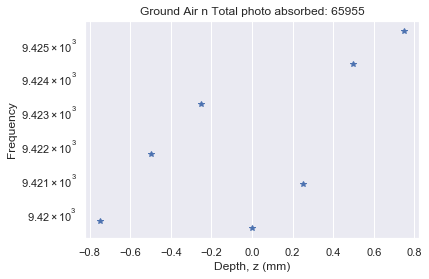

In [75]:
c = df.groupby(['z']).mean()['counts']
total = sum(c)
plt.semilogy(c, '*')
plt.title('Ground Air n Total photo absorbed: %d' %total)
plt.xlabel('Depth, z (mm)')
plt.ylabel('Frequency')

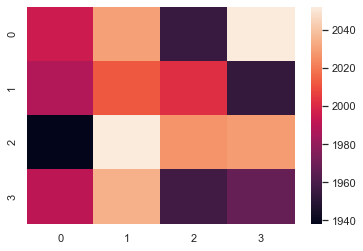

In [57]:
data = np.array([[1995,2030,1955,2052],[1988,2012,2002,1954],[1938,2052,2027,2029],[1991,2035,1958,1968]])
sns.heatmap(data)

In [12]:
layer1 = df[df['z'] == -0.75]
layer2 = df[df['z'] == -0.25]
layer3 = df[df['z'] == 0.25]
layer4 = df[df['z'] == 0.75]

In [26]:
x = layer1['x']
y = layer1['y']
c = layer1['counts']
layer1[layer1['x'] == -0.25].sort_values(by=['y'])

,x,y,z,counts
14,-0.25,-0.75,-0.75,2109
9,-0.25,-0.25,-0.75,1966
56,-0.25,0.25,-0.75,1962
61,-0.25,0.75,-0.75,2003


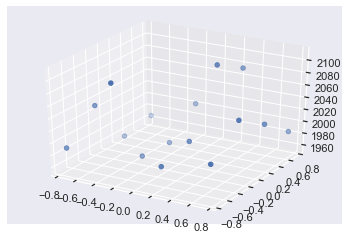

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,c)

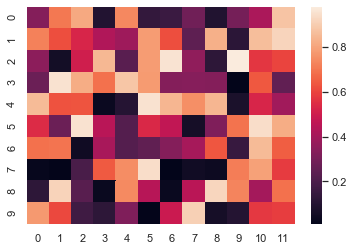

In [17]:
uniform_data = np.random.rand(10,12)
sns.heatmap(uniform_data)

In [36]:
69964/70000

0.9994857142857143

In [37]:
69586/70000

0.9940857142857142

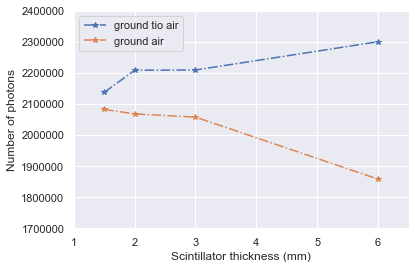

In [10]:
polishedtioair = [2210324, 2378973, 2313028, 2143013]
polishedair = [2201299, 2135792, 2026096, 1758177]
groundtioair = [2137238, 2208666, 2209484, 2300489]
groundair = [2082693, 2068034, 2057787, 1858207]
thickness = [1.5, 2, 3, 6]

# plt.plot(thickness, polishedtioair, '-.*', label="polished tio air")
# plt.plot(thickness, polishedair, '-.*', label="polished  air")
plt.plot(thickness, groundtioair, '-.*', label="ground tio air")
plt.plot(thickness, groundair, '-.*', label="ground air")
plt.xlabel("Scintillator thickness (mm)")
plt.ylabel("Number of photons")
plt.axis([1,6.5,1700000,2400000])
plt.legend()

## Refractive Index of VM2000


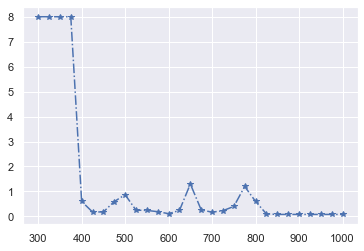

In [200]:
wavelength = [300,   325,   350,   375,   400,   425,   450,   475,   500,   525,
    550,   575,   600,   625,   650,   675,   700,   725,   750,   775,
    800,   825,   850,   875,   900,   925,   950,   975,  1000]

refractive_index = [ 8.0,   8.0,   8.0,   8.0,   0.6, 0.178,  0.18, 0.595,  0.87,  0.25,
    0.24,  0.19,  0.11,  0.24,   1.3,  0.26,  0.17,  0.23,  0.40,   1.2,
    0.6,   0.1,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08]

plt.plot(wavelength, refractive_index, '-.*')

In [201]:
critical_angle(1.55, 0.6)

22.773972400659893

## Reading data (optical photons)

In [87]:
folder = ''
model = '_unified'
finishes = ['groundair', 'groundteflonair', 'groundvm2000air', 
            'polishedair', 'polishedteflonair', 'polishedvm2000air']
for finish in finishes:
    filename1 = "%soptical_photon_2.5eV_1.5mm_LUT_%s.root" % (folder, finish)
    filename2 = "%soptical_photon_2.5eV_2mm_LUT_%s.root" % (folder, finish)
    filename3 = "%soptical_photon_2.5eV_6mm_LUT_%s.root"% (folder, finish)
    filename4 = "%soptical_photon_2.5eV_20mm_LUT_%s.root"% (folder, finish)

    print("%s%s = [%d, %d, %d, %d]" % 
         (finish, model, get_entries(filename1), get_entries(filename2), 
          get_entries(filename3), get_entries(filename4))
         )

groundair_unified = [2537, 1657, 318, 42]
groundteflonair_unified = [8982, 9761, 9379, 8568]
groundvm2000air_unified = [9018, 9836, 9597, 8995]
polishedair_unified = [2589, 1669, 318, 29]
polishedteflonair_unified = [8951, 9604, 8693, 6955]
polishedvm2000air_unified = [8929, 9643, 9086, 8003]


## BGO simulation (optical photons only)

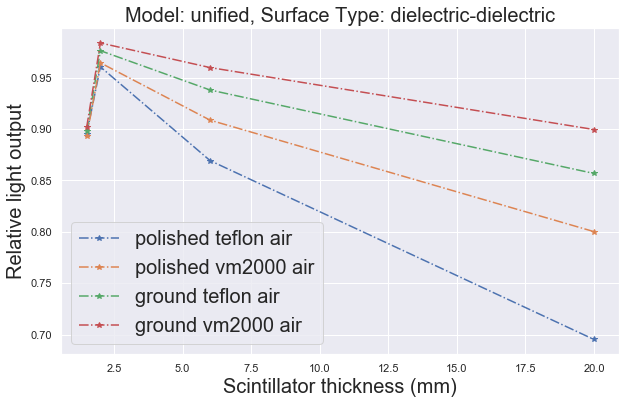

In [89]:
# BGO using unified model and sigmaalpha value from Janecek 2010
thickness = [1.5, 2, 6, 20]
groundair_unified = [8032, 8882, 7890, 4571]
groundteflonair_unified = [8546, 9756, 9178, 6685]
groundvm2000air_unified = [8615, 9748, 9075, 6516]
polishedair_unified = [8034, 8952, 7857, 4562]
polishedteflonair_unified = [7335, 8175, 8434, 8180]
polishedvm2000air_unified = [7299, 8110, 8274, 7794]

# BGO using unified model and sigmaalpha value from Janecek 2010 (sipm op surface corrected, polished)
groundair_unified = [8533, 9101, 8156, 6655]
groundteflonair_unified = [8982, 9761, 9379, 8568]
groundvm2000air_unified = [9018, 9836, 9597, 8995]
polishedair_unified = [8368, 8658, 7662, 6413]
polishedteflonair_unified = [8951, 9604, 8693, 6955]
polishedvm2000air_unified = [8929, 9643, 9086, 8003]

groundair_unified = [2537, 1657, 318, 42]
groundteflonair_unified = [8982, 9761, 9379, 8568]
groundvm2000air_unified = [9018, 9836, 9597, 8995]
polishedair_unified = [2589, 1669, 318, 29]
polishedteflonair_unified = [8951, 9604, 8693, 6955]
polishedvm2000air_unified = [8929, 9643, 9086, 8003]

def normalize(data):
    return [i/10000 for i in data]

groundair_unified = normalize(groundair_unified)
groundteflonair_unified = normalize(groundteflonair_unified)
groundvm2000air_unified = normalize(groundvm2000air_unified)
polishedair_unified = normalize(polishedair_unified)
polishedteflonair_unified = normalize(polishedteflonair_unified)
polishedvm2000air_unified = normalize(polishedvm2000air_unified)

plt.figure(figsize=[10,6])
# plt.plot(thickness, polishedair_unified, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_unified, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_unified, '-.*', label="polished vm2000 air") 
# plt.plot(thickness, groundair_unified, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_unified, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_unified, '-.*', label="ground vm2000 air") 
plt.title("Model: unified, Surface Type: dielectric-dielectric", fontsize=20)
# plt.axis([19.9,20.02,0.45,0.52])
plt.xlabel("Scintillator thickness (mm)", fontsize=20)
plt.ylabel("Relative light output", fontsize=20)
# plt.xticks(np.arange(0.,21.,1), fontsize=15)
# plt.yticks(np.arange(0.8, 1.1, 0.1), fontsize=20)
plt.legend( fontsize=20)

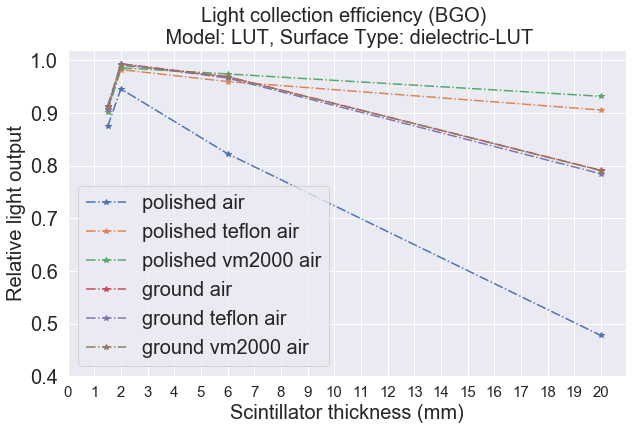

In [131]:
thickness = [1.5, 2, 6, 20]
# BGO using LUT model (corrected SiPM_OpSurface - ground, sigmaalpha = 0)
groundair_LUT = [8784, 9386, 8217, 4854]
groundteflonair_LUT = [9109, 9927, 9654, 7896]
groundvm2000air_LUT = [9078, 9934, 9676, 7859]
polishedair_LUT = [8758, 9429, 8323, 4961]
polishedteflonair_LUT = [9056, 9836, 9612, 9092]
polishedvm2000air_LUT = [8995, 9870, 9727, 9345]

# BGO using LUT model (corrected SiPM_OpSurface_polished)
groundair_LUT = [9113, 9936, 9690, 7911]
groundteflonair_LUT = [9076, 9931, 9664, 7846]
groundvm2000air_LUT = [9137, 9910, 9690, 7907]
polishedair_LUT = [8744, 9458, 8227, 4775]
polishedteflonair_LUT = [9048, 9824, 9598, 9057]
polishedvm2000air_LUT = [9027, 9858, 9742, 9317]

def normalize(data):
    return [i/10000 for i in data]

groundair_LUT = normalize(groundair_LUT)
groundteflonair_LUT = normalize(groundteflonair_LUT)
groundvm2000air_LUT = normalize(groundvm2000air_LUT)
polishedair_LUT = normalize(polishedair_LUT)
polishedteflonair_LUT = normalize(polishedteflonair_LUT)
polishedvm2000air_LUT = normalize(polishedvm2000air_LUT)

plt.figure(figsize=[10,6])
plt.plot(thickness, polishedair_LUT, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_LUT, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_LUT, '-.*', label="polished vm2000 air") 
plt.plot(thickness, groundair_LUT, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_LUT, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_LUT, '-.*', label="ground vm2000 air") 
plt.title("Light collection efficiency (BGO) \n Model: LUT, Surface Type: dielectric-LUT", fontsize=20)
# plt.axis([19.9,20.02,0.45,0.52])
plt.xlabel("Scintillator thickness (mm)", fontsize=20)
plt.ylabel("Relative light output", fontsize=20)
plt.xticks(np.arange(0.,21.,1), fontsize=15)
plt.yticks(np.arange(0.4, 1.1, 0.1), fontsize=20)
plt.legend( fontsize=20)

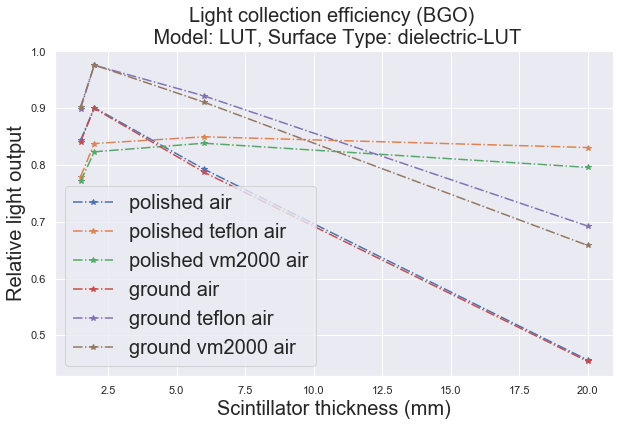

In [54]:
# BGO using LUT model (previous uncorrected possibly) 
groundair_LUT = [8411, 8997, 7873, 4540]
groundteflonair_LUT = [8992, 9758, 9218, 6924]
groundvm2000air_LUT = [9025, 9762, 9107, 6583]
polishedair_LUT = [8434, 9011, 7928, 4563]
polishedteflonair_LUT = [7792, 8378, 8497, 8308]
polishedvm2000air_LUT = [7710, 8233, 8384, 7958]

def normalize(data):
    return [i/10000 for i in data]

groundair_LUT = normalize(groundair_LUT)
groundteflonair_LUT = normalize(groundteflonair_LUT)
groundvm2000air_LUT = normalize(groundvm2000air_LUT)
polishedair_LUT = normalize(polishedair_LUT)
polishedteflonair_LUT = normalize(polishedteflonair_LUT)
polishedvm2000air_LUT = normalize(polishedvm2000air_LUT)

plt.figure(figsize=[10,6])
plt.plot(thickness, polishedair_LUT, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_LUT, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_LUT, '-.*', label="polished vm2000 air") 
plt.plot(thickness, groundair_LUT, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_LUT, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_LUT, '-.*', label="ground vm2000 air") 
plt.title("Light collection efficiency (BGO) \n Model: LUT, Surface Type: dielectric-LUT", fontsize=20)
# plt.axis([19.9,20.02,0.45,0.52])
plt.xlabel("Scintillator thickness (mm)", fontsize=20)
plt.ylabel("Relative light output", fontsize=20)
# plt.xticks(np.arange(0.,21.,1), fontsize=15)
# plt.yticks(np.arange(0.8, 1.1, 0.1), fontsize=20)
plt.legend( fontsize=20)

## GS20 (optical photons)

In [7]:
thickness = [1.5, 2, 6, 20]
groundair_unified = [4275, 3625, 2499, 1474]
groundteflonair_unified = [8879, 9571, 8754, 6737]
groundvm2000air_unified = [8909, 9624, 9278, 8514]
polishedair_unified = [4631, 4245, 3598, 2979]
polishedteflonair_unified = [8919, 9601, 8502, 5152]
polishedvm2000air_unified = [8020, 8312, 7834, 7029]

def normalize(data):
    return [i/10000 for i in data]

groundair_unified = normalize(groundair_unified)
groundteflonair_unified = normalize(groundteflonair_unified)
groundvm2000air_unified = normalize(groundvm2000air_unified)
polishedair_unified = normalize(polishedair_unified)
polishedteflonair_unified = normalize(polishedteflonair_unified)
polishedvm2000air_unified = normalize(polishedvm2000air_unified)

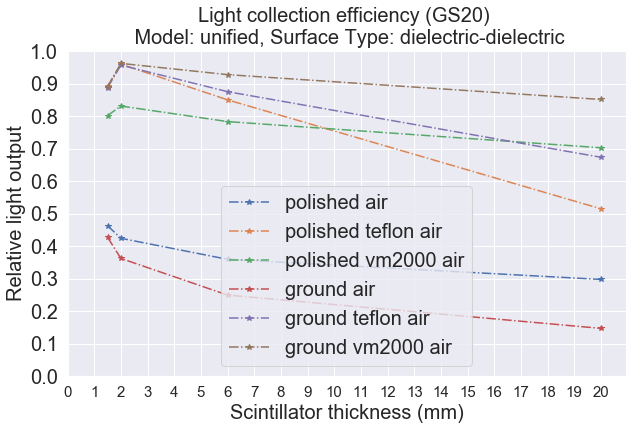

In [114]:
plt.figure(figsize=[10,6])
plt.plot(thickness, polishedair_unified, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_unified, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_unified, '-.*', label="polished vm2000 air") 
plt.plot(thickness, groundair_unified, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_unified, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_unified, '-.*', label="ground vm2000 air") 
plt.title("Light collection efficiency (GS20) \n Model: unified, Surface Type: dielectric-dielectric", fontsize=20)
# plt.axis([0,22,0,1])
plt.xlabel("Scintillator thickness (mm)", fontsize=20)
plt.ylabel("Relative light output", fontsize=20)
plt.xticks(np.arange(0.,21.,1), fontsize=15)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=20)
plt.legend( fontsize=20)

## LYSO (optical photons)

In [15]:
thickness = [1.5, 2, 6, 20]
groundair_DAVIS = [4213, 3513, 2233, 764]
groundteflonair_DAVIS = [8014, 8425, 6926, 3799]
groundvm2000air_DAVIS = [7902, 8237, 6670, 3828]
polishedair_DAVIS = [4069, 3337, 2776, 1752]
polishedteflonair_DAVIS = [4595, 3992, 3405, 2086]
polishedvm2000air_DAVIS = [4710, 3954, 3431, 2082]

# groundair_DAVIS = [4141, 3531, 2196, 817]
# groundteflonair_DAVIS = [7982, 8410, 6997, 3927]
# groundvm2000air_DAVIS = [7908, 8065, 6696, 3891]
# polishedair_DAVIS = [4112, 3345, 2830, 1637]
# polishedteflonair_DAVIS = [4699, 4022, 3327, 2136]
# polishedvm2000air_DAVIS = [4622, 3965, 3333, 2065]
groundair_DAVIS = [5186, 4868, 2728, 911]
groundteflonair_DAVIS = [8638, 9150, 7690, 4427]
groundvm2000air_DAVIS = [8519, 9077, 7785, 4630]
polishedair_DAVIS = [6161, 6012, 4731, 2690]
polishedteflonair_DAVIS = [8043, 8151, 6519, 3875]
polishedvm2000air_DAVIS = [8003, 8092, 6406, 3722]

groundair_DAVIS = normalize(groundair_DAVIS)
groundteflonair_DAVIS = normalize(groundteflonair_DAVIS)
groundvm2000air_DAVIS = normalize(groundvm2000air_DAVIS)
polishedair_DAVIS = normalize(polishedair_DAVIS)
polishedteflonair_DAVIS = normalize(polishedteflonair_DAVIS)
polishedvm2000air_DAVIS = normalize(polishedvm2000air_DAVIS)

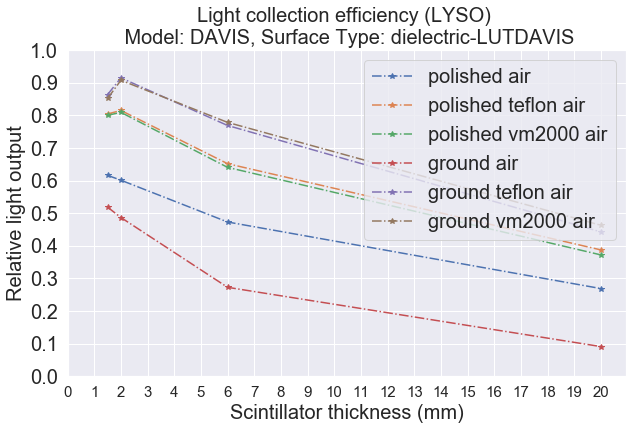

In [16]:
plt.figure(figsize=[10,6])
plt.plot(thickness, polishedair_DAVIS, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_DAVIS, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_DAVIS, '-.*', label="polished vm2000 air") 
plt.plot(thickness, groundair_DAVIS, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_DAVIS, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_DAVIS, '-.*', label="ground vm2000 air") 
plt.title("Light collection efficiency (LYSO) \n Model: DAVIS, Surface Type: dielectric-LUTDAVIS", fontsize=20)
# plt.axis([0,22,0,1])
plt.xlabel("Scintillator thickness (mm)", fontsize=20)
plt.ylabel("Relative light output", fontsize=20)
plt.xticks(np.arange(0.,21.,1), fontsize=15)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=20)
plt.legend( fontsize=20)

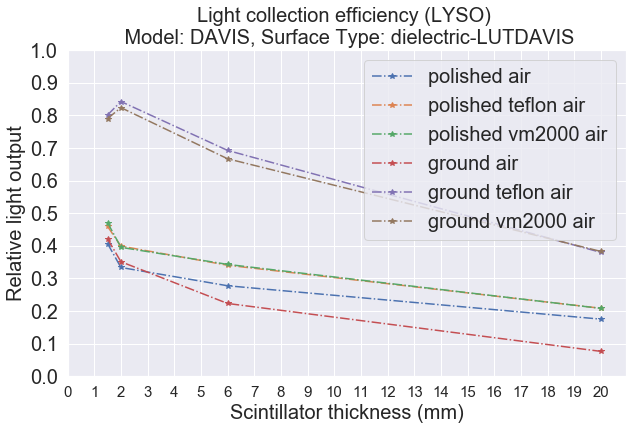

In [13]:
plt.figure(figsize=[10,6])
plt.plot(thickness, polishedair_DAVIS, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_DAVIS, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_DAVIS, '-.*', label="polished vm2000 air") 
plt.plot(thickness, groundair_DAVIS, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_DAVIS, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_DAVIS, '-.*', label="ground vm2000 air") 
plt.title("Light collection efficiency (LYSO) \n Model: DAVIS, Surface Type: dielectric-LUTDAVIS", fontsize=20)
# plt.axis([0,22,0,1])
plt.xlabel("Scintillator thickness (mm)", fontsize=20)
plt.ylabel("Relative light output", fontsize=20)
plt.xticks(np.arange(0.,21.,1), fontsize=15)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=20)
plt.legend( fontsize=20)

## Monolithic Scintillator on SiPM Pixel Array

In [189]:
# Reading data
folder = ''
model = '_LUT'
finishes = ['groundair', 'groundteflonair', 'groundvm2000air', 
            'polishedair', 'polishedteflonair', 'polishedvm2000air']
# for finish in finishes:
#     filename1 = "%soptical_photon_2.5eV_1.5mm_LUT_%s.root" % (folder, finish)
#     filename2 = "%soptical_photon_2.5eV_2mm_LUT_%s.root" % (folder, finish)
#     filename3 = "%soptical_photon_2.5eV_6mm_LUT_%s.root"% (folder, finish)
#     filename4 = "%soptical_photon_2.5eV_20mm_LUT_%s.root"% (folder, finish)

#     print("%s%s = [%d, %d, %d, %d]" % 
#          (finish, model, get_entries(filename1), get_entries(filename2), 
#           get_entries(filename3), get_entries(filename4))
#          )

def get_positions(filename):
    file = uproot.open(filename)
    events = file['Hits']
    positions = events.array("m_positions")
    return positions

def first_nearest_neighbor(target_row, target_col, array):
    NN1 = []
    target = array[target_row][target_col]
    for i in range(target_row-1,target_row+2):
        for j in range(target_row-1,target_row+2):
                NN1.append(array[i][j])

    NN1.remove(target)
    return NN1


def second_nearest_neighbor(target_row, target_col, array, nn1):
    NN2 = []
    target = array[target_row][target_col]
    for i in range(target_row-2, target_row+3):
        for j in range(target_row-2, target_row+3):
            NN2.append(array[i][j])
    NN2.remove(target)
    for i in nn1:
        NN2.remove(i)
    return NN2

def percent_difference(nn1, nn2):
    a = np.mean(nn1)
    b = np.mean(nn2)
    return (a-b)/a

(array([[  52.,   39.,   70.,   79.,   84.,   65.,   63.,   83.],
       [  38.,   22.,   26.,   31.,   45.,   43.,   25.,   48.],
       [  67.,   32.,   43.,   60.,  107.,   72.,   49.,   93.],
       [  69.,   37.,   69.,  144.,  244.,  153.,   69.,  144.],
       [  97.,   40.,   91.,  249., 1268.,  258.,   91.,  139.],
       [  77.,   32.,   65.,  147.,  273.,  139.,   73.,  122.],
       [  64.,   26.,   59.,   60.,   82.,   62.,   43.,   74.],
       [  67.,   68.,   91.,  110.,  143.,  138.,  121.,   99.]]), array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]), array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]), <matplotlib.collections.QuadMesh object at 0x7fa4f29f89d0>)


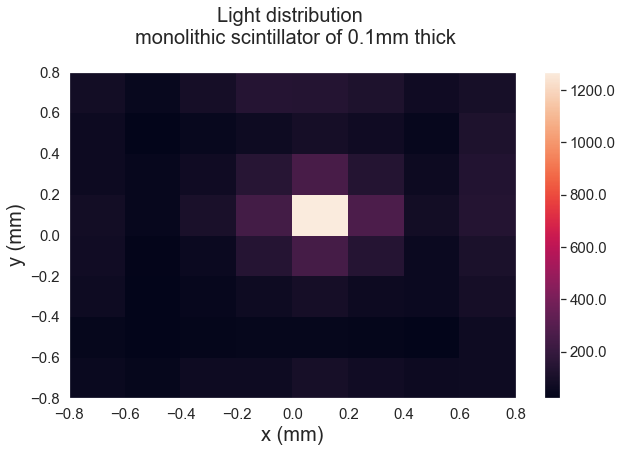

In [204]:
folder = 'monolithic_scintillator_sipm_pixel_array/'
filename = folder + "monolithic_optical_photons_2.5eV_0.1mm_LUT_polishedair.root"
file = uproot.open(filename)
events = file['Hits']
position = events.array("m_position")
x, y, z = position.x, position.y, position.z
plt.figure(figsize=[10,6])
a = plt.hist2d(x,y, bins=[8,8])
plt.xlabel('x (mm)', fontsize=20)
plt.ylabel('y (mm)', fontsize=20)
plt.title('Light distribution \n  monolithic scintillator of %0.1fmm thick \n' % (0.1), fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar()
ticklabs = cbar.ax.get_yticks()
cbar.ax.set_yticklabels(ticklabs, fontsize=15)
print(a)

In [207]:
array = a[0]
print(array)
target = array[4][4]
print('target = %d' % target)
target_col = 4
target_row = 4

nn1 = first_nearest_neighbor(4,4,array)
print(nn1)

nn2 = second_nearest_neighbor(target_row, target_col, array, nn1)
print(nn2)
print(percent_difference(nn1,nn2))
np.mean(nn2)/np.mean(nn1)

[[  52.   39.   70.   79.   84.   65.   63.   83.]
 [  38.   22.   26.   31.   45.   43.   25.   48.]
 [  67.   32.   43.   60.  107.   72.   49.   93.]
 [  69.   37.   69.  144.  244.  153.   69.  144.]
 [  97.   40.   91.  249. 1268.  258.   91.  139.]
 [  77.   32.   65.  147.  273.  139.   73.  122.]
 [  64.   26.   59.   60.   82.   62.   43.   74.]
 [  67.   68.   91.  110.  143.  138.  121.   99.]]
target = 1268
[144.0, 244.0, 153.0, 249.0, 258.0, 147.0, 273.0, 139.0]
[43.0, 60.0, 107.0, 72.0, 49.0, 69.0, 69.0, 91.0, 91.0, 65.0, 73.0, 59.0, 60.0, 82.0, 62.0, 43.0]
0.6593030491599253


0.3406969508400747

In [134]:
target = 1268
NN1 = [ 144.,  244.,  153., 249., 258., 147.,  273.,  139.]
NN2 = [ 43.,   60.,  107.,   72.,   49., 69., 69., 91., 91., 65., 73., 59.,   60.,   82.,   62.,   43.]

np.mean(NN2)/np.mean(NN1)

0.3406969508400747

In [182]:
print(folder)

(array([[ 43.,  46.,  54.,  68.,  61.,  69.,  39.,  64.],
       [ 36.,  20.,  38.,  33.,  24.,  23.,  15.,  40.],
       [ 53.,  23.,  25.,  40.,  53.,  46.,  39.,  66.],
       [ 66.,  31.,  50., 109., 175., 128.,  43., 102.],
       [ 51.,  22.,  67., 182., 790., 194.,  64., 111.],
       [ 51.,  31.,  66., 113., 146., 110.,  50.,  97.],
       [ 48.,  28.,  49.,  55.,  62.,  54.,  41.,  82.],
       [ 62.,  38.,  74., 100.,  96., 111.,  66.,  83.]]), array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]), array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]), <matplotlib.collections.QuadMesh object at 0x7fa4f27c7250>)


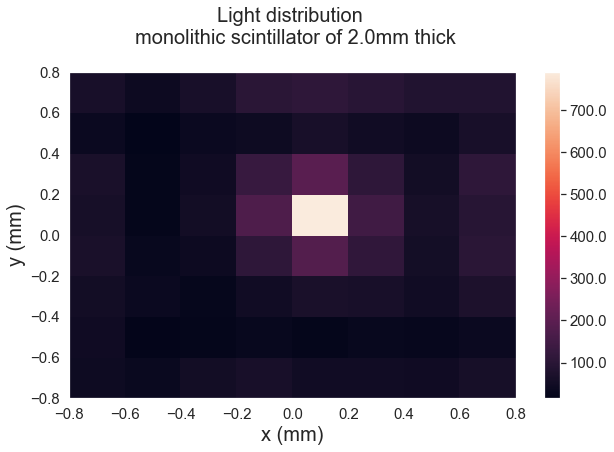

In [202]:
folder = 'monolithic_scintillator_sipm_pixel_array/'
filename = folder + "monolithic_optical_photons_2.5eV_2mm_LUT_polishedteflonair.root"
file = uproot.open(filename)
events = file['Hits']
position = events.array("m_position")
x, y, z = position.x, position.y, position.z

plt.figure(figsize=[10,6])
a = plt.hist2d(x,y, bins=[8,8])
plt.xlabel('x (mm)', fontsize=20)
plt.ylabel('y (mm)', fontsize=20)
plt.title('Light distribution \n  monolithic scintillator of %0.1fmm thick \n' % (2.0), fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar()
ticklabs = cbar.ax.get_yticks()
cbar.ax.set_yticklabels(ticklabs, fontsize=15)
print(a)

In [203]:
array = a[0]
print(array)
target = array[4][4]
print('target = %d' % target)
target_col = 4
target_row = 4

nn1 = first_nearest_neighbor(4,4,array)
print(nn1)

nn2 = second_nearest_neighbor(target_row, target_col, array, nn1)
print(nn2)
print(percent_difference(nn1,nn2))
np.mean(nn2)/np.mean(nn1)


[[ 43.  46.  54.  68.  61.  69.  39.  64.]
 [ 36.  20.  38.  33.  24.  23.  15.  40.]
 [ 53.  23.  25.  40.  53.  46.  39.  66.]
 [ 66.  31.  50. 109. 175. 128.  43. 102.]
 [ 51.  22.  67. 182. 790. 194.  64. 111.]
 [ 51.  31.  66. 113. 146. 110.  50.  97.]
 [ 48.  28.  49.  55.  62.  54.  41.  82.]
 [ 62.  38.  74. 100.  96. 111.  66.  83.]]
target = 790
[109.0, 175.0, 128.0, 182.0, 194.0, 113.0, 146.0, 110.0]
[25.0, 40.0, 53.0, 46.0, 39.0, 50.0, 43.0, 67.0, 64.0, 66.0, 50.0, 49.0, 55.0, 62.0, 54.0, 41.0]
0.6525496974935178


0.3474503025064823

In [135]:
target = 790
NN1 = [109., 175., 128., 113., 146., 110., 182., 194.]
NN2 = [ 25.,  40.,  53.,  46.,  39., 49.,  55.,  62.,  54.,  41., 50., 67., 66., 43., 64., 50]

np.mean(NN2)/np.mean(NN1)

0.3474503025064823

(array([[  4.,   4.,  11.,   9.,  14.,  11.,   8.,   8.],
       [  1.,  14.,  13.,  22.,  23.,  29.,  17.,   8.],
       [  9.,  13.,  32.,  39.,  88.,  45.,  38.,  16.],
       [ 12.,  30.,  54., 154., 288., 148.,  63.,  23.],
       [ 12.,  29.,  78., 271., 634., 255.,  68.,  25.],
       [  8.,  22.,  73., 171., 323., 172.,  54.,  23.],
       [ 17.,  16.,  37.,  57.,  62.,  56.,  32.,  14.],
       [  6.,   7.,  15.,  24.,  29.,  13.,  28.,  11.]]), array([-0.79509229, -0.59675594, -0.3984196 , -0.20008325, -0.0017469 ,
        0.19658945,  0.39492579,  0.59326214,  0.79159849]), array([-0.7939674 , -0.59500842, -0.39604944, -0.19709045,  0.00186853,
        0.20082751,  0.39978649,  0.59874547,  0.79770445]), <matplotlib.collections.QuadMesh object at 0x7fa4f2598250>)


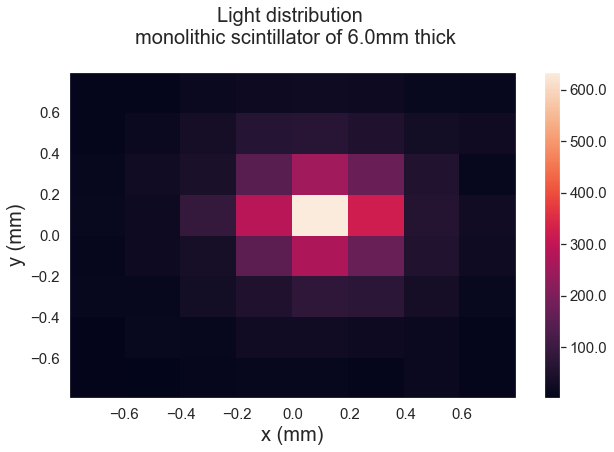

In [200]:
filename = folder + "monolithic_optical_photons_2.5eV_6mm_LUT_polishedteflonair.root"
file = uproot.open(filename)
events = file['Hits']
position = events.array("m_position")
x, y, z = position.x, position.y, position.z

plt.figure(figsize=[10,6])
a = plt.hist2d(x,y, bins=[8,8])
plt.xlabel('x (mm)', fontsize=20)
plt.ylabel('y (mm)', fontsize=20)
plt.title('Light distribution \n  monolithic scintillator of %0.1fmm thick \n' % (6.0), fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar()
ticklabs = cbar.ax.get_yticks()
cbar.ax.set_yticklabels(ticklabs, fontsize=15)
print(a)


In [201]:
array = a[0]
print(array)
target = array[4][4]
print('target = %d' % target)
target_col = 4
target_row = 4

nn1 = first_nearest_neighbor(4,4,array)
print(nn1)

nn2 = second_nearest_neighbor(target_row, target_col, array, nn1)
print(nn2)
print(percent_difference(nn1,nn2))
np.mean(nn2)/np.mean(nn1)

[[  4.   4.  11.   9.  14.  11.   8.   8.]
 [  1.  14.  13.  22.  23.  29.  17.   8.]
 [  9.  13.  32.  39.  88.  45.  38.  16.]
 [ 12.  30.  54. 154. 288. 148.  63.  23.]
 [ 12.  29.  78. 271. 634. 255.  68.  25.]
 [  8.  22.  73. 171. 323. 172.  54.  23.]
 [ 17.  16.  37.  57.  62.  56.  32.  14.]
 [  6.   7.  15.  24.  29.  13.  28.  11.]]
target = 634
[154.0, 288.0, 148.0, 271.0, 255.0, 171.0, 323.0, 172.0]
[32.0, 39.0, 88.0, 45.0, 38.0, 54.0, 63.0, 78.0, 68.0, 73.0, 54.0, 37.0, 57.0, 62.0, 56.0, 32.0]
0.7542087542087542


0.24579124579124578

In [164]:
target = 634
NN1 = [154., 288., 148., 271., 255., 171., 323., 172.]
NN2 = [32.,  39.,  88.,  45.,  38., 54., 63., 78., 68.,73.,  54.,37.,  57.,  62.,  56.,  32.]
sum(NN2)
np.mean(NN2)/np.mean(NN1)

0.24579124579124578

(array([[14., 12.,  9., 21., 21., 22., 25., 11.],
       [ 8., 14., 12., 15., 23., 24., 10., 20.],
       [10., 19., 25., 32., 23., 18., 23., 18.],
       [12., 18., 22., 36., 42., 30., 28., 22.],
       [18., 24., 28., 42., 47., 39., 28., 19.],
       [15., 25., 19., 37., 32., 31., 35., 20.],
       [23., 14., 25., 25., 26., 34., 33., 20.],
       [12., 11., 18., 20., 24., 24., 26., 15.]]), array([-0.79607932, -0.59673853, -0.39739774, -0.19805695,  0.00128384,
        0.20062463,  0.39996542,  0.59930621,  0.798647  ]), array([-7.98932851e-01, -5.99352359e-01, -3.99771867e-01, -2.00191374e-01,
       -6.10882304e-04,  1.98969610e-01,  3.98550102e-01,  5.98130594e-01,
        7.97711086e-01]), <matplotlib.collections.QuadMesh object at 0x7fa510a68a50>)


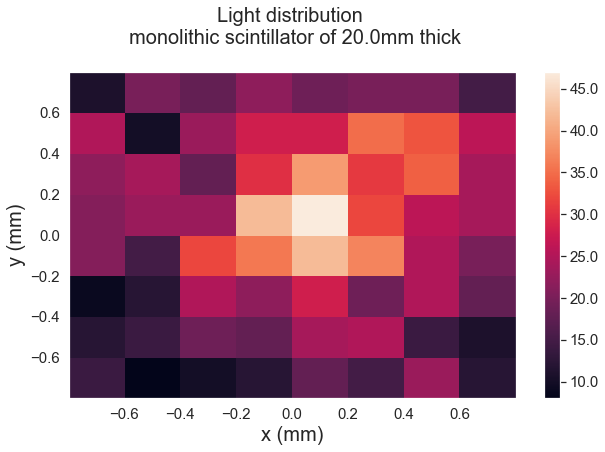

In [195]:
filename = folder + "monolithic_optical_photons_2.5eV_20mm_LUT_polishedteflonair.root"
file = uproot.open(filename)
events = file['Hits']
position = events.array("m_position")
x, y, z = position.x, position.y, position.z

plt.figure(figsize=[10,6])
a = plt.hist2d(x,y, bins=[8,8])
plt.xlabel('x (mm)', fontsize=20)
plt.ylabel('y (mm)', fontsize=20)
plt.title('Light distribution \n  monolithic scintillator of %0.1fmm thick \n' % (20), fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar()
ticklabs = cbar.ax.get_yticks()
cbar.ax.set_yticklabels(ticklabs, fontsize=15)
print(a)

In [197]:
array = a[0]
print(array)
target = array[4][4]
print('target = %d' % target)
target_col = 4
target_row = 4

nn1 = first_nearest_neighbor(4,4,array)
print(nn1)

nn2 = second_nearest_neighbor(target_row, target_col, array, nn1)
print(nn2)
print(percent_difference(nn1,nn2))
np.mean(nn2)/np.mean(nn1)

[[14. 12.  9. 21. 21. 22. 25. 11.]
 [ 8. 14. 12. 15. 23. 24. 10. 20.]
 [10. 19. 25. 32. 23. 18. 23. 18.]
 [12. 18. 22. 36. 42. 30. 28. 22.]
 [18. 24. 28. 42. 47. 39. 28. 19.]
 [15. 25. 19. 37. 32. 31. 35. 20.]
 [23. 14. 25. 25. 26. 34. 33. 20.]
 [12. 11. 18. 20. 24. 24. 26. 15.]]
target = 47
[36.0, 42.0, 30.0, 42.0, 39.0, 37.0, 32.0, 31.0]
[25.0, 23.0, 18.0, 23.0, 22.0, 28.0, 28.0, 28.0, 19.0, 32.0, 35.0, 25.0, 25.0, 26.0, 34.0, 33.0]
0.2664359861591695


0.7335640138408305